# Assignment 2

Welcome to assignment #2! In this assignment we're going to be doing some exploratory data analysis (EDA) on a dataset using pandas.

**Note: You need to answer all questions in complete sentences. Failure to do so will result in part or zero marks.**

**Make sure that you can save this notebook to your own Google Drive space! Otherwise, your answers will not be saved!**

Before you start, I'd like you to watch the following video. This is a good first introduction and review of some of the topics we'll be covering in this course.

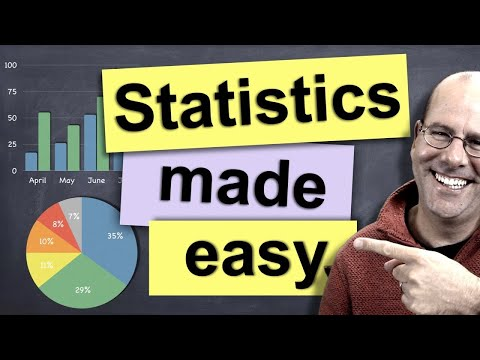

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("I10q6fjPxJ0")

In [2]:
# First, load our libraries
import pandas as pd
import scipy.stats
import numpy as np
import pandas.api.types
import math

from IPython.core.magic import register_cell_magic

## Load house price data

In [3]:
hp = pd.read_csv("https://busan302.mycourses.work/data/house_price_train.csv") #1460 rows
hp.head() # peek at first 5 lines!

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data dictionary
Here are brief explanations of our variables. You will **rarely** have a detailed dictionary in any organization. This means that your initial explorations of the data are absolutely crucial so that you can understand your data!

In [4]:
from IPython.display import IFrame
IFrame(src='https://busan302.mycourses.work/data/house_price_data_description_short.html', width=800, height=300)

## Exploratory data analysis
Let's see how pre-1945 houses differ from houses built post-1980s.

<div class="alert alert-block alert-success">

### Q1. Complete the code in the cells below. (2 marks total)
Replace the elipses '...' with appropriate goals to meet the defined goals.
</div>

In [20]:
# Create subsets of old (pre-1945) and new houses (1980 onwards)

#Old homes

old_homes = hp[hp["YearBuilt"] < 1945]

#New homes
new_homes = hp[hp["YearBuilt"] >= 1980]


In [21]:
# Find the means of the numeric variables in the new_homes and old_homes dataframes.
#The means of New homes

nh = np.mean(new_homes)

#The means of Old homes

oh = np.mean(old_homes)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Compare new and old homes
The next cell will concatenate the averages you found for new and old homes.
If you did the previous question correctly, you will see average values for new and old homes in the output.

<div class="alert alert-block alert-success">
    
### Q2. Compare the rows that is generated from the code that follows. Answer each of the following:

(a) What general impressions do you have about new versus older homes?

(b) Briefly describe how newer and older homes differ. 

(c) Do any of the differences surprise you? 

(d) What do you think accounts for the differences?
</div>

In [7]:
# Consider the data from this table
df = pd.concat([oh, nh], axis=1) # Take the Series created from the previous question. Concat will place them side by side in a dataframe
df.columns = ['old houses', 'new houses'] # Give the columns descriptive names
df # jupyter prints out the last line for us

,old houses,new houses
Id,739.682482,717.622549
MSSubClass,61.478102,60.751634
LotFrontage,62.796000,72.641326
LotArea,8977.890511,10258.459150
OverallQual,5.368613,7.163399
OverallCond,6.215328,5.116013
YearBuilt,1922.470803,2000.171569
YearRemodAdd,1971.463504,2000.928105
MasVnrArea,12.178832,157.677686
BsmtFinSF1,188.273723,526.535948


### A2. Write your answers in this cell
(a) Generally, new homes' floor space has bigger space than older homes.

(b) The most significant difference between newer and older homes is the average sale price of new homes are approximately $100,000 higher than old homes and newer homes show that there is a high number of trading.

(c) The surprise is that the average floor space of the new houses is much bigger than the old ones, which means the new houses are supposed to be built with large bedrooms than other area. Also, there is no difference in annual home sales and monthly home sales between newer and older homes.

(d) The differences show that the construction trend has been developed. The floor space of the old homes is built with plenty of small bedrooms; however, newer homes tend to be built on a large scale of bedrooms.


<div class="alert alert-block alert-warning">  

## Looking at differences
We'd like to compare the differences between older and newer houses a little more rigorously. Let's use a t-test to statistically compare the average value of new homes and old homes across a number of characteristics. 

The loop below looks over the columns from our dataframes. If the column is numeric it runs a t-test. The output is a printout of the variable that is used in the t-test and the difference that results when we substrat the average for new homes minus the average for old homes.

For example, look at the line: 
<pre>
LotArea       (new house value - old house value) = 1280.57 	     p-value=0.0009
</pre>
This output means that the average lot area of new homes is 1280.6 square feet larger than the average lot area of older homes. The p-value is the likelihood that we would see this difference if the null hypothesis was true. That means there's a 0.0009% likelihood of seeing this difference under the null! i.e., not very likely! :-)
    
</div>

<div class="alert alert-block alert-success">

### Q3. The presenter in the video talked about two types of data to conduct a t-test: categorical and numeric variables (2 marks).

(a) What is the null hypothesis of the t-test?

(b) Give an example of the categorical and numeric variables we are considering when we conduct the t-test in the code below.

</div>


### A3. Place your answers below.

(a) The null hypothesis is the p-value equivalent to 0.

(b) Example variables are:

- categorical: Age group, Gender

- numeric: Weight, Height


In [8]:
for var in old_homes.columns:
    
    # Next line checks that the dataframe column is numeric.
    if not pandas.api.types.is_numeric_dtype( old_homes[var].dtype ):
        continue # skip all non-numeric columns
    
    # t-test: do a t-test to compare means for the column in the old and new house dataframes
    t = scipy.stats.ttest_ind( old_homes[var], new_homes[var] )
    
    if t[1] < 0.05: # Only print cases where the p-value is less than 5%. We'll say for our purposes this is significant.
        # The f"" syntax is a formatted string. It may be a little cryptic if you're new to python!
        print( f"{var} \t (new house value - old house value) = {round( new_homes[var].mean() - old_homes[var].mean(), 2)} \tp-value={round(t[1],4)}" )


LotArea 	 (new house value - old house value) = 1280.57 	p-value=0.0009
OverallQual 	 (new house value - old house value) = 1.79 	p-value=0.0
OverallCond 	 (new house value - old house value) = -1.1 	p-value=0.0
YearBuilt 	 (new house value - old house value) = 77.7 	p-value=0.0
YearRemodAdd 	 (new house value - old house value) = 29.46 	p-value=0.0
BsmtFinSF1 	 (new house value - old house value) = 338.26 	p-value=0.0
BsmtUnfSF 	 (new house value - old house value) = 100.01 	p-value=0.0029
TotalBsmtSF 	 (new house value - old house value) = 442.04 	p-value=0.0
1stFlrSF 	 (new house value - old house value) = 315.79 	p-value=0.0
LowQualFinSF 	 (new house value - old house value) = -27.09 	p-value=0.0
GrLivArea 	 (new house value - old house value) = 249.35 	p-value=0.0
BsmtFullBath 	 (new house value - old house value) = 0.31 	p-value=0.0
FullBath 	 (new house value - old house value) = 0.61 	p-value=0.0
HalfBath 	 (new house value - old house value) = 0.3 	p-value=0.0
BedroomAbvGr 	 (

<div class="alert alert-block alert-success">

### Q4. Plot histograms for the SalePrice of older homes and newer homes. Describe the shape of each histogram (3 marks).

You can find out more about [how to plot histograms in pandas here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist).    
    
</div>

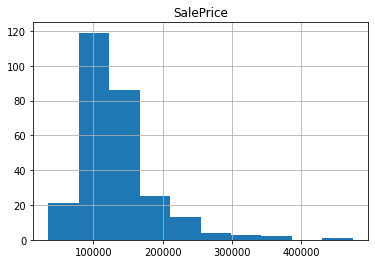

In [9]:
# older homes histogram

oh_hist = old_homes.hist(column="SalePrice")

### A4. I would describe the distribution as a right-skewed plot of the SalePrice of older homes. About 120 houses have been sold for approximately 100,000 dollars and the highest sale price of house was approximately more than 400,000 dollars.


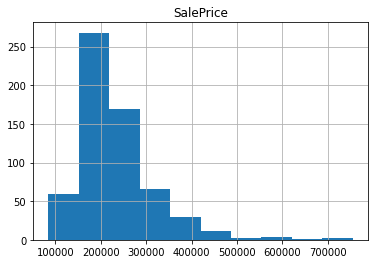

In [ ]:
# newer homes histogram

nh_hist = new_homes.hist(column="SalePrice")

### A4. I would describe the distribution as a right-skewed plot of the SalePrice of newer homes. About more than 270 houses have been sold for approximately 200,000 dollars and the highest sale price of the house was approximately more than 700,000 dollars.




<div class="alert alert-block alert-success">

### Use the original dataframe (hp) to answer the following questions.

### Q5. (a) When people are selling their home they look at many different aspects of a house. Choose one variable that you think is important when buying a home and explain your reasoning (1 mark).
    
### Q5 (b) Show a scatter plot of your variable of choice versus SalePrice (1 mark).
    
### Q5 (c) Explain the relationship you see. (1 mark)
    
   </div>

In [12]:
# The top 10 of the highest house sale price for reference (Optional - The sorted highest price helps to decide to sell homes)

hp["SalePrice"].sort_values(ascending=False).head(10)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

### A5 (a) I think this variable is important ...
- The most significant variable is the house's sale price because people wish to sell at a reasonable home price, so the selling price will play a significant role in whether or not people should sell a home.


### A5 (b) Show the scatter plot below. 

You can find out more about [how to make a scatter plot with pandas here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html). The syntax is [dataframe].plot.scatter()

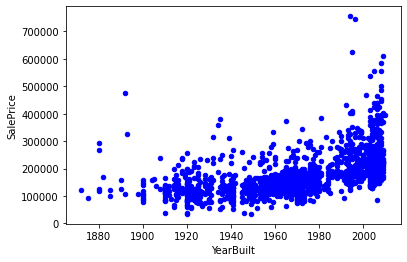

In [19]:
house_scatter = hp.plot.scatter("YearBuilt", "SalePrice", c="blue")

### A5 (c) I see the following relationship:
- The scatter plot shows a positive relationship that the sale price of homes gradually an increasing since 1900. Also, house trading has noticeably increased since 1920 regardless of the year of the houses.